<a href="https://colab.research.google.com/github/vitoananda/Sentiment_Analysis_Python/blob/master/Sentimen_Analyst_Pengunjung_PVJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install Wordcloud
!pip install Sastrawi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 4891, in parseImpl
    return super().parseImpl(instring, loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 4790, in parseImpl
    loc, tokens = self_expr_parse(instring, loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 817, in _parseNoCache
    loc, tokens = self.parseImpl(instring, pre_loc, doActions)
  File "/usr/local/lib/python3.10/dist

In [7]:
data = pd.read_csv('/content/data.csv', sep=';', encoding='utf-8')
data.head()

,Photo Profile,User Name,Sentimen,Sejak Comment,Comment,Jumlah Like Comment
0,https://lh3.googleusercontent.com/a-/ALV-UjU9Y...,edi setijawan,Positive,4 hari lalu,"Mall favorite di bandung, menawarkan branded f...",3
1,https://lh3.googleusercontent.com/a-/ALV-UjW4j...,Yustina Dwilia Pebrinia (Justina Dwilia),Positive,sebulan lalu,"konsep mall yang unik hehe, 11rb langkah ga ke...",4
2,https://lh3.googleusercontent.com/a-/ALV-UjV7q...,Alexandra Ruszaika,Positive,sebulan lalu,"Such a nice place, mall nya luas banget.. Adem...",4
3,https://lh3.googleusercontent.com/a-/ALV-UjVuY...,dony Setiawan,Positive,4 bulan lalu,Salah satu mall yang terletak di bandung didae...,10
4,https://lh3.googleusercontent.com/a/ACg8ocJ9Il...,Marvello Tanzha,Positive,3 minggu lalu,Tempatnya luas banget sampe bingung pas muter ...,17


In [8]:
import string
import re
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', str(text)).lower()
data['cleaned_text'] = data['Comment'].apply(lambda x: clean_text(x))
data.head()

,Photo Profile,User Name,Sentimen,Sejak Comment,Comment,Jumlah Like Comment,cleaned_text
0,https://lh3.googleusercontent.com/a-/ALV-UjU9Y...,edi setijawan,Positive,4 hari lalu,"Mall favorite di bandung, menawarkan branded f...",3,mall favorite di bandung menawarkan branded f...
1,https://lh3.googleusercontent.com/a-/ALV-UjW4j...,Yustina Dwilia Pebrinia (Justina Dwilia),Positive,sebulan lalu,"konsep mall yang unik hehe, 11rb langkah ga ke...",4,konsep mall yang unik hehe rb langkah ga ke...
2,https://lh3.googleusercontent.com/a-/ALV-UjV7q...,Alexandra Ruszaika,Positive,sebulan lalu,"Such a nice place, mall nya luas banget.. Adem...",4,such a nice place mall nya luas banget adem...
3,https://lh3.googleusercontent.com/a-/ALV-UjVuY...,dony Setiawan,Positive,4 bulan lalu,Salah satu mall yang terletak di bandung didae...,10,salah satu mall yang terletak di bandung didae...
4,https://lh3.googleusercontent.com/a/ACg8ocJ9Il...,Marvello Tanzha,Positive,3 minggu lalu,Tempatnya luas banget sampe bingung pas muter ...,17,tempatnya luas banget sampe bingung pas muter ...


In [9]:
data.drop(columns = ['Comment','Jumlah Like Comment','Photo Profile'], inplace = True)
data.columns = ['User Name',	'Sentimen',	'Sejak Comment','cleaned_text']
data.head()

,User Name,Sentimen,Sejak Comment,cleaned_text
0,edi setijawan,Positive,4 hari lalu,mall favorite di bandung menawarkan branded f...
1,Yustina Dwilia Pebrinia (Justina Dwilia),Positive,sebulan lalu,konsep mall yang unik hehe rb langkah ga ke...
2,Alexandra Ruszaika,Positive,sebulan lalu,such a nice place mall nya luas banget adem...
3,dony Setiawan,Positive,4 bulan lalu,salah satu mall yang terletak di bandung didae...
4,Marvello Tanzha,Positive,3 minggu lalu,tempatnya luas banget sampe bingung pas muter ...


1. Data Understanding


In [10]:
data.dtypes

User Name        object
Sentimen         object
Sejak Comment    object
cleaned_text     object
dtype: object

In [11]:
data.shape

(1041, 4)

In [12]:
data.isnull().sum()

User Name        0
Sentimen         0
Sejak Comment    0
cleaned_text     0
dtype: int64

In [13]:
data.describe()

,User Name,Sentimen,Sejak Comment,cleaned_text
count,1041,1041,1041,1041
unique,1039,2,27,1037
top,Amelia Kandau,Positive,setahun lalu,selalu cinta sama pvj bandung karena banyak se...
freq,2,920,173,2


2. Preprocesing Data

In [14]:
data.head()

,User Name,Sentimen,Sejak Comment,cleaned_text
0,edi setijawan,Positive,4 hari lalu,mall favorite di bandung menawarkan branded f...
1,Yustina Dwilia Pebrinia (Justina Dwilia),Positive,sebulan lalu,konsep mall yang unik hehe rb langkah ga ke...
2,Alexandra Ruszaika,Positive,sebulan lalu,such a nice place mall nya luas banget adem...
3,dony Setiawan,Positive,4 bulan lalu,salah satu mall yang terletak di bandung didae...
4,Marvello Tanzha,Positive,3 minggu lalu,tempatnya luas banget sampe bingung pas muter ...


In [15]:
#Normalisasi
norm = {"kerasa":"terasa","muter":"memutar","pas":"saat","ga":"tidak", "sampe":"sampai","tmpat":"tempat","gak":"tidak"," dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['cleaned_text'] = data['cleaned_text'].apply(lambda x: normalisasi(x))

In [16]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: stopword(x))
data.head()

,User Name,Sentimen,Sejak Comment,cleaned_text
0,edi setijawan,Positive,4 hari lalu,mall favorite bandung menawarkan branded fash...
1,Yustina Dwilia Pebrinia (Justina Dwilia),Positive,sebulan lalu,konsep mall unik hehe rb langkah terasa jal...
2,Alexandra Ruszaika,Positive,sebulan lalu,such a nice place mall nya luas banget adem...
3,dony Setiawan,Positive,4 bulan lalu,salah satu mall terletak bandung didaerah seti...
4,Marvello Tanzha,Positive,3 minggu lalu,tempatnya luas banget bingung memutar ngtidakk...


In [17]:
#Tokenisasi
tokenized = data['cleaned_text'].apply(lambda x:x.split())
tokenized

0       [mall, favorite, bandung, menawarkan, branded,...
1       [konsep, mall, unik, hehe, rb, langkah, terasa...
2       [such, a, nice, place, mall, nya, luas, banget...
3       [salah, satu, mall, terletak, bandung, didaera...
4       [tempatnya, luas, banget, bingung, memutar, ng...
                              ...                        
1036    [mall, rame, hits, tp, minim, toilet, klo, lg,...
1037                         [mall, pembangunanya, beres]
1038    [mall, besar, minim, toilet, antri, toilet, se...
1039    [not, bad, at, all, kurang, suka, dentidakn, s...
1040    [toilet, termasuk, toilet, bioskop, kotor, bau...
Name: cleaned_text, Length: 1041, dtype: object

In [21]:
#steaming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/databersih1.csv', index=False)
data_clean = pd.read_csv('databersih1.csv', encoding='latin1')

mall favorite bandung tawar branded fashion restaurant kelas menentidakh atas suasana nyaman belanja baju jutidak mampir makan siang restaurant jepang tempat parkir luas ramah anak
konsep mall unik hehe rb langkah asa jalan sini cuma aku suka toilet cowo pesing banget aku lewatin mau musholla cuma mungkin yg perlu ditambahin tempat adalah tunjuk arah gitu biar mudah nyasar hehehe
such a nice place mall nya luas banget adem dentidakn konsep alam dapet karna mudah jalan tetep adem alias teduh semua tenant bioskop cgv sebatidakinya sedia satu mall
salah satu mall letak bandung daerah setiabudi salah satu mall cukup jadi favorit ketika kunjung bandung lokasi strategis terlalu jauh exit tol saatteur specialnya tenant tenant sini
tempat luas banget bingung putar ngtidakk balik air mancur atas bagus banget toilet bagus banyak tempat foto jutidak
pvj adl salah satu pusat belanja kenal kota bandung yg tawar berbatidaki jenis butuh mulai fashion produk cantik sehat kuliner hingtidak hibur kalian

In [22]:
data_clean.head()

,cleaned_text
0,mall favorite bandung tawar branded fashion re...
1,konsep mall unik hehe rb langkah asa jalan sin...
2,such a nice place mall nya luas banget adem de...
3,salah satu mall letak bandung daerah setiabudi...
4,tempat luas banget bingung putar ngtidakk bali...


In [23]:
at1 = pd.read_csv('/content/databersih1.csv')
at2 = pd.read_csv('/content/data.csv', sep=';', encoding='utf-8')
at2 = at2['Sentimen']

data_clean = pd.concat([at1,at2], axis=1)
data_clean

,cleaned_text,Sentimen
0,mall favorite bandung tawar branded fashion re...,Positive
1,konsep mall unik hehe rb langkah asa jalan sin...,Positive
2,such a nice place mall nya luas banget adem de...,Positive
3,salah satu mall letak bandung daerah setiabudi...,Positive
4,tempat luas banget bingung putar ngtidakk bali...,Positive
...,...,...
1036,mall rame hits tp minim toilet klo lg rame toi...,Negative
1037,mall pembangunanya beres,Negative
1038,mall besar minim toilet antri toilet setentida...,Negative
1039,not bad at all kurang suka dentidakn service i...,Negative


In [24]:
data_clean = data_clean.replace({'Positive':1, 'Negative':0})
data_clean.head()

,cleaned_text,Sentimen
0,mall favorite bandung tawar branded fashion re...,1
1,konsep mall unik hehe rb langkah asa jalan sin...,1
2,such a nice place mall nya luas banget adem de...,1
3,salah satu mall letak bandung daerah setiabudi...,1
4,tempat luas banget bingung putar ngtidakk bali...,1


3. Visualisasi Data


In [25]:
data_negative = data_clean[data_clean['Sentimen'] == 0]
data_positive = data_clean[data_clean['Sentimen'] == 1]
data_clean.head()

,cleaned_text,Sentimen
0,mall favorite bandung tawar branded fashion re...,1
1,konsep mall unik hehe rb langkah asa jalan sin...,1
2,such a nice place mall nya luas banget adem de...,1
3,salah satu mall letak bandung daerah setiabudi...,1
4,tempat luas banget bingung putar ngtidakk bali...,1


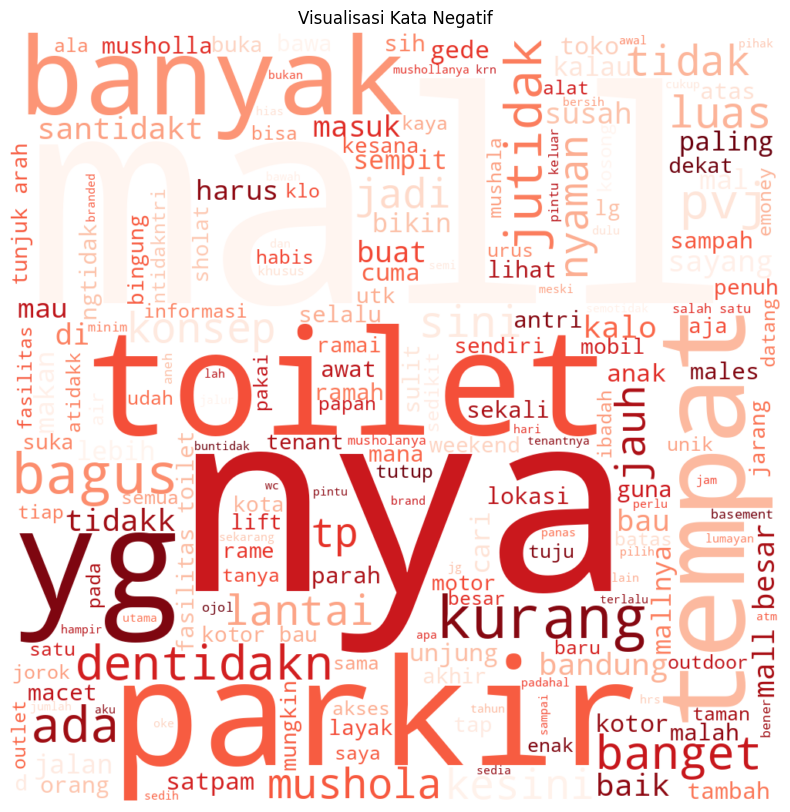

In [26]:
from wordcloud import WordCloud

# Convert all elements to strings while joining
all_text_s0 = ' '.join(str(word) for word in data_negative['cleaned_text'] if isinstance(word, str))

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

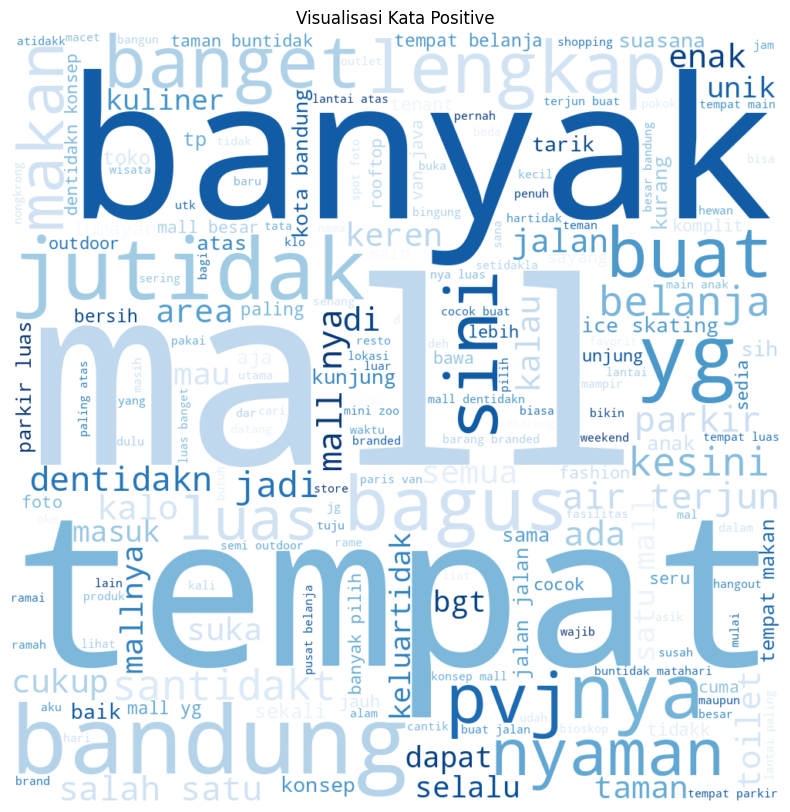

In [27]:
from wordcloud import WordCloud

# Convert all elements to strings while joining
all_text_s1 = ' '.join(str(word) for word in data_positive['cleaned_text'] if isinstance(word, str))

wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positive")
plt.margins(x=0, y=0)
plt.show()

In [28]:
data_clean['Sentimen'].value_counts()

1    920
0    121
Name: Sentimen, dtype: int64

In [29]:
data_clean.head()

,cleaned_text,Sentimen
0,mall favorite bandung tawar branded fashion re...,1
1,konsep mall unik hehe rb langkah asa jalan sin...,1
2,such a nice place mall nya luas banget adem de...,1
3,salah satu mall letak bandung daerah setiabudi...,1
4,tempat luas banget bingung putar ngtidakk bali...,1


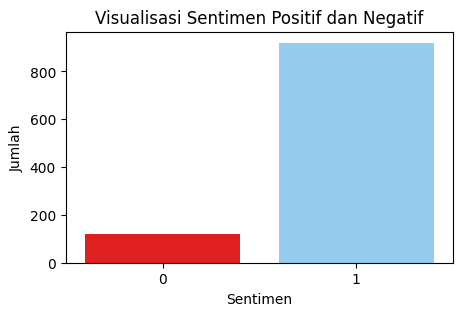

In [30]:
#Visualisasi sentimen positif dan negatif
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for different levels of Sentimen
colors = {0: "red", 1: "lightskyblue"}

plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='Sentimen', palette=colors)
plt.title("Visualisasi Sentimen Positif dan Negatif")
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

4. Data Preparation

In [31]:
#Memisahkan data menjadi data latih dan data uji
x = data_clean['cleaned_text']
y = data_clean['Sentimen']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=42)

In [32]:
#Menggunakan Countvectorizer untuk mengubah teks menjadi fitur numerik
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming x_train contains your training text data

# Replace NaN values with empty strings
x_train.fillna('', inplace=True)

# Use CountVectorizer
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [33]:
#Melakukan oversampling menggunakan SMOTE pada data train

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)

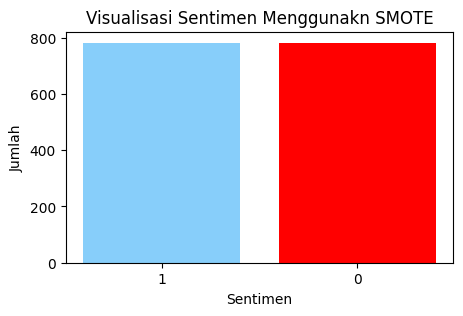

In [34]:
#Contoh data hasil resampling
Sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.title("Visualisasi Sentimen Menggunakn SMOTE")
plt.bar(Sentimen_counts.index, Sentimen_counts.values, color=['red','lightskyblue'])
plt.xticks(Sentimen_counts.index, ['0','1'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

5. Modeling

In [35]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [36]:
y_pred = naive_bayes.predict(x_test_vec)

In [37]:
#evaluasi model

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print("Akurasi Model Naive Bayes :", accuracy)
print("\nLaporan Klasifikasi : \n", classification_rep)

Akurasi Model Naive Bayes : 0.8662420382165605

Laporan Klasifikasi : 
               precision    recall  f1-score   support

     negatif       0.44      0.42      0.43        19
     positif       0.92      0.93      0.92       138

    accuracy                           0.87       157
   macro avg       0.68      0.67      0.68       157
weighted avg       0.86      0.87      0.86       157



6. Testing

In [41]:
# Analisis komentar
def analisis_komentar(comment):
    # Lakukan analisis sentimen pada komentar
    new_text_vec = vectorizer.transform([comment])
    predicted_sentimen = naive_bayes.predict(new_text_vec)

    if predicted_sentimen[0] == 1:
        sentiment_label = "Pengunjung Puas"
    elif predicted_sentimen[0] == 0:
        sentiment_label = "Pengunjung Tidak Puas"

    return sentiment_label

# Memberikan saran perbaikan
def saran_perbaikan(comment):
    # Analisis komentar untuk identifikasi sentimen
    sentiment = analisis_komentar(comment)
    list_saran = []  # Buat list kosong untuk menyimpan saran

    if sentiment == "Pengunjung Tidak Puas":
        # Penyusunan saran perbaikan berdasarkan sentimen yang tidak puas
        if "bau" in comment.lower():
            list_saran.append("Perlu peningkatan kebersihan atau ventilasi di area mall.")
        if "toilet" in comment.lower():
            list_saran.append("Perlu peningkatan fasilitas dan kebersihan pada toilet mall")
        if "antri" in comment.lower():
            list_saran.append("Perlu koordinasi serta peningkatan fasilitas mall agar tidak terjadi antrian")
        if "kotor" in comment.lower():
            list_saran.append("Perlu penambahan petugas kebersihan dan fasilitas pendukung untuk kebersihan Mall PVJ")
        if "mushola" in comment.lower():
            list_saran.append("Perlu peningkatan fasilitas untuk Mushola mall PVJ")
        return list_saran
    else:
        return ["Tidak ada hal yang harus di perbaiki, Terima kasih atas komentar Anda!"]  # Jika puas, kembalikan pesan ini

# Contoh penggunaan
comment_input = input("\nMasukan Comment Baru: ")
saran = saran_perbaikan(comment_input)
print("Hasil Kepuasan Pengunjung PVJ Mall:", analisis_komentar(comment_input))
if len(saran) > 0:
    print("Saran Perbaikan:")
    for idx, s in enumerate(saran, start=1):
        print(f"{idx}. {s}")



Masukan Comment Baru: Mall nyah enak cuman management parkirnya parah.sempit dan gak ada otak masa di tanjakkan bisa parkir dan sempit
Hasil Kepuasan Pengunjung PVJ Mall: Pengunjung Tidak Puas
